In [2]:
import nltk

In [3]:
mensajes = [line.rstrip() for line in open ("smsspamcollection/SMSSpamCollection")]

mensajes

In [5]:
mensajes[1]

'ham\tOk lar... Joking wif u oni...'

In [6]:
print(len(mensajes))

5574


In [7]:
import pandas as pd

In [8]:
mensajesdf = pd.read_csv("smsspamcollection/SMSSpamCollection", sep="\t", names=["etiqueta","mensaje"])

In [9]:
mensajesdf.head()

,etiqueta,mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mensajesdf['longitud'] = mensajesdf['mensaje'].apply(len)

In [11]:
mensajesdf.head()

,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as snsn

<Axes: ylabel='Frequency'>

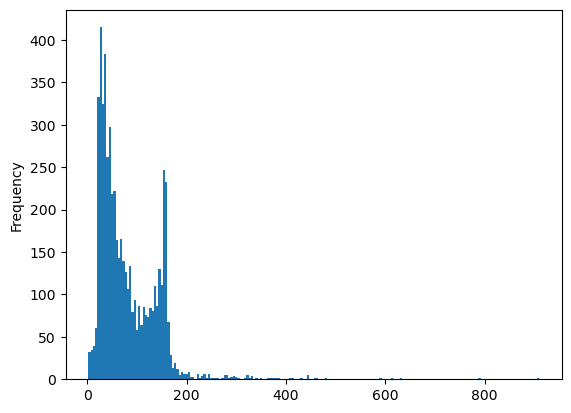

In [13]:
mensajesdf['longitud'].plot.hist(bins=200)

In [14]:
mensajesdf ['longitud'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: longitud, dtype: float64

In [15]:
mensajesdf[mensajesdf['longitud'] == 910]['mensaje'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

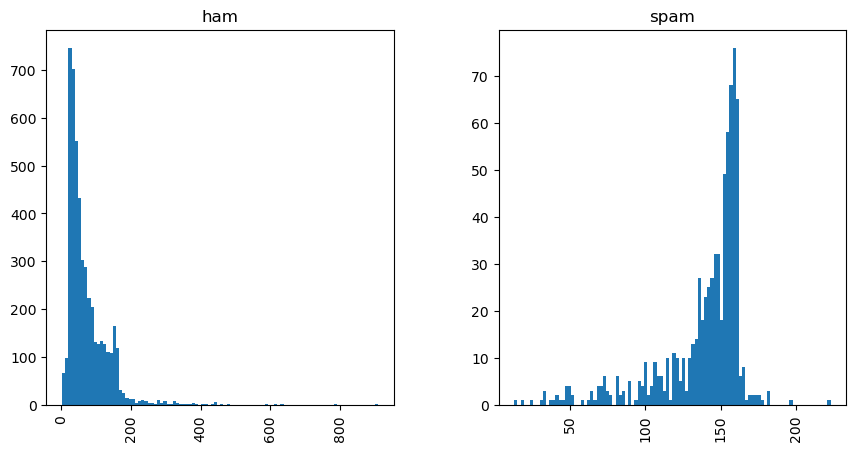

In [16]:
mensajesdf.hist(column='longitud', by='etiqueta', bins=100, figsize=(10,5))

In [17]:
# Procesamiento de textos

In [18]:
import string

In [19]:
cadena = 'Mensaje de ejemplo! Nota: Esta mensaje tiene signos de puntuación'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
sinpuntuacion = [c for c in cadena if c not in string.punctuation]

In [22]:
sinpuntuacion =''.join(sinpuntuacion)

In [23]:
sinpuntuacion

'Mensaje de ejemplo Nota Esta mensaje tiene signos de puntuación'

In [37]:
from nltk.corpus import stopwords

In [44]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [49]:
palabras = sinpuntuacion.split()
palabras

['Mensaje',
 'de',
 'ejemplo',
 'Nota',
 'Esta',
 'mensaje',
 'tiene',
 'signos',
 'de',
 'puntuación']

In [53]:
cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]

In [55]:
cadena_limpia

['Mensaje', 'ejemplo', 'Nota', 'mensaje', 'signos', 'puntuación']

In [57]:
# 110 Crear Función Detección Spam

In [63]:
def procesar_texto(cadena):
    sinpuntuacion = [c for c in cadena if c not in string.punctuation]
    sinpuntuacion =''.join(sinpuntuacion)
    palabras = sinpuntuacion.split()
    cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]
    return cadena_limpia

In [65]:
cadena = 'Mensaje de ejemplo! Nota: Esta mensaje tiene signos de puntuación'
resultado = procesar_texto(cadena)

In [67]:
print(resultado)

['Mensaje', 'ejemplo', 'Nota', 'mensaje', 'signos', 'puntuación']


In [69]:
mensajesdf.head()


,etiqueta,mensaje,longitud
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [75]:
mensajesdf['mensaje'].head(5).apply(procesar_texto)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, wkly, comp, to, win, FA, ...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, goes, to, usf, lives, ar...
Name: mensaje, dtype: object

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
transformador = CountVectorizer(analyzer=procesar_texto).fit(mensajesdf['mensaje'])

In [81]:
print(transformador.vocabulary_)

{'Go': 2103, 'until': 11009, 'jurong': 7767, 'point': 9145, 'crazy': 5956, 'Available': 1130, 'only': 8817, 'in': 7536, 'bugis': 5402, 'n': 8552, 'great': 7131, 'world': 11429, 'buffet': 5401, 'Cine': 1518, 'there': 10659, 'got': 7100, 'amore': 4824, 'wat': 11218, 'Ok': 3156, 'lar': 7913, 'Joking': 2521, 'wif': 11335, 'u': 10946, 'oni': 8812, 'Free': 1983, 'entry': 6522, '2': 423, 'wkly': 11388, 'comp': 5806, 'to': 10766, 'win': 11348, 'FA': 1872, 'Cup': 1586, 'final': 6748, 'tkts': 10759, '21st': 443, 'May': 2879, '2005': 430, 'Text': 4073, '87121': 871, 'receive': 9481, 'questionstd': 9387, 'txt': 10934, 'rateTCs': 9428, 'apply': 4905, '08452810075over18s': 73, 'U': 4199, 'dun': 6396, 'say': 9785, 'so': 10125, 'early': 6415, 'hor': 7389, 'c': 5447, 'already': 4799, 'then': 10654, 'Nah': 3028, 'I': 2348, 'dont': 6314, 'think': 10677, 'goes': 7071, 'usf': 11049, 'lives': 8054, 'around': 4952, 'here': 7298, 'though': 10696, 'FreeMsg': 1985, 'Hey': 2276, 'darling': 6052, 'its': 7672, 'be

In [85]:
mensaje3 = mensajesdf['mensaje'][3]

In [87]:
mensaje3

'U dun say so early hor... U c already then say...'

In [89]:
mensaje3_transformado = transformador.transform([mensaje3])

In [91]:
print (mensaje3_transformado)

  (0, 4199)	2
  (0, 4799)	1
  (0, 5447)	1
  (0, 6396)	1
  (0, 6415)	1
  (0, 7389)	1
  (0, 9785)	2
  (0, 10125)	1
  (0, 10654)	1


In [101]:
transformador.get_feature_names_out()[4799]

'already'

In [ ]:
# Predicciones